# Enhanced Project Overview
## Abstract
This project is inspired by the challenge of colorizing medical images, particularly focusing on cellular imagery. In many domains of medical imaging, especially those involving cell imaging, the acquisition of high-quality, colorized images is hindered by the limitations of chemical staining processes. These processes often fail to adequately differentiate cellular structures, posing significant obstacles for cell segmentation and associated analytical tasks. Addressing this gap, our project leverages advanced deep learning techniques to enhance cell image colorization, thereby facilitating improved segmentation and analysis.

## Introduction
In the realm of medical imaging, the precise visualization of cellular structures is paramount for accurate analysis and diagnosis. Traditional chemical staining methods, while indispensable, often yield suboptimal results due to their inability to distinctly highlight cellular components. This limitation becomes particularly evident in tasks requiring fine-grained segmentation, where the quality of colorization directly impacts the effectiveness of the analysis.

Recognizing the critical need for enhanced colorization methodologies, our project explores the utilization of deep learning algorithms to achieve realistic colorization of grayscale cell images. By integrating cutting-edge techniques with comprehensive datasets, we aim to set a new standard for image quality in cellular analysis.

## Methodology
Data Acquisition
Our research predominantly utilizes two datasets, carefully selected for their relevance and potential to impact the field of cell study:

1. HeLa Dataset: Sourced from the Cell Tracking Challenge (https://celltrackingchallenge.net/2d-datasets/), this dataset is pivotal due to its association with the HeLa cell line – a cornerstone in cellular and cancer research. The HeLa dataset is renowned for its extensive use and has significantly contributed to advancing the understanding of cell behavior.

2. GOWT Dataset: This dataset is distinguished by its clearly defined cell shapes, facilitating precise segmentation tasks. Such distinct morphological features make the GOWT dataset an invaluable resource for testing and improving colorization techniques.

Both datasets include segmentation ground truth, serving as a critical benchmark for evaluating the fidelity of our colorization approach.

## Target Dataset
To benchmark our colorization results against real-world data, we utilize a dataset from The Cancer Genome Atlas (TCGA) available at https://portal.gdc.cancer.gov/analysis_page. Specifically, the image TCGA-CF-A5UA-01Z-00-DX1.7352D4EB-46F5-4EAA-95B9-1D869E8291C3.SVS was chosen for its high-quality, real-world colorized cell imagery. This dataset enables us to compare our colorized outputs against authentic colorized images, ensuring that our results are both realistic and applicable to practical analysis.

## Objectives
The primary goal of our project is to overcome the limitations imposed by traditional chemical staining techniques through the application of deep learning algorithms for image colorization. By achieving more accurate and realistic colorization, we aim to significantly enhance the clarity and usefulness of cell images for segmentation and further analysis. This advancement holds the promise of propelling research and diagnostic capabilities within the medical and scientific communities.

## Conclusion
Our project represents a pioneering effort to merge the fields of deep learning and medical imaging, specifically targeting the enhancement of cell image colorization. Through careful dataset selection and the application of sophisticated machine learning models, we aspire to overcome longstanding challenges in cellular analysis, paving the way for groundbreaking discoveries and advancements in medical research and diagnostics.

In [14]:
# Import needed modules
# Import packages
import time
from options.train_options import TrainOptions
from data import create_dataset
from models import create_model, improved_losses
from util.visualizer import Visualizer
import sys
import os
import torch
import numpy as np
# Import plt
import matplotlib.pyplot as plt
import shutil
import subprocess
from collections import defaultdict

# Dataset Visualization
Visualize the grayscale HeLa and GOWT cell images and target TCGA cell images

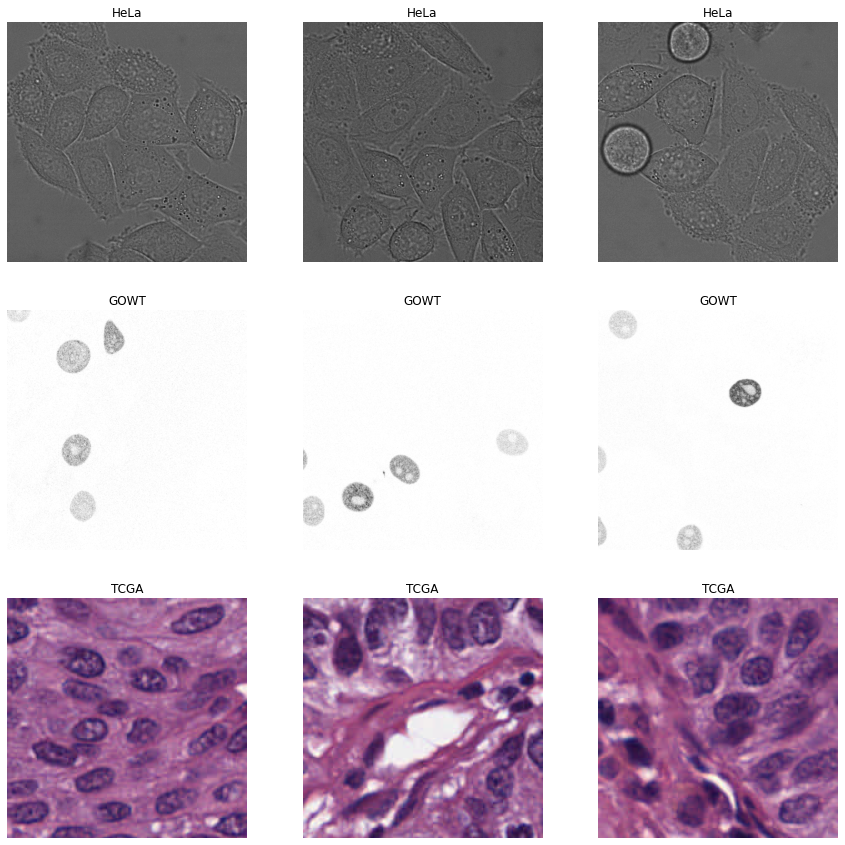

In [75]:
# Visualize the grayscale HeLa and GOWT cell images and target TCGA cell images

"""
Define the function to visualize the images in a 3x3 grid.
Read 3 random images from each of the 3 directories and display them in a 3x3 grid.
First row naed as HeLa, second row as GOWT and third row as TCGA.
Parameters:
    - img_paths: 3 different image directories each containing the images to be visualized
Returns:
    - None
"""
def visualize_images(img_paths, rows):
    
    # Create a figure with 3x3 subplots
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    # Loop through the 3 directories
    for i, img_path in enumerate(img_paths):
        # Get the image names
        img_names = os.listdir(img_path)
        # Get 3 random indices
        random_indices = np.random.randint(0, len(img_names), 3)
        # Loop through the 3 random indices
        for j, idx in enumerate(random_indices):
            # Read the image
            img = plt.imread(os.path.join(img_path, img_names[idx]))
            # Display the image
            axs[i, j].imshow(img, cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title(rows[i])
    # Display the figure
    plt.show()


# Allocate the image directories to be visualized
visualize_images(['Training_Datasets/training_dataset_tiledHeLa_Fakulty/trainA', 'Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse/trainA', 'Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse/trainB'],rows=['HeLa', 'GOWT', 'TCGA'])




# Part 1: CycleGAN Image Colorization and Evaluation
## Detailed Implementation Process: Unpaired Colorization Using CycleGAN
This section elaborates on the technical aspects of implementing unpaired colorization for cellular images within the GOWT and HeLa datasets using the CycleGAN model. The goal of this process is to employ advanced machine learning techniques to achieve realistic colorization of grayscale cellular images, with the aim of enhancing cell segmentation and analysis.

### Implementation Overview
The CycleGAN model is at the core of our approach, chosen for its effectiveness in handling unpaired image-to-image translation tasks. This model enables the conversion of grayscale images from the GOWT and HeLa datasets into their colorized counterparts without the need for one-to-one mapping between grayscale and color images. Our methodology leverages the CycleGAN architecture to learn the underlying distribution of colors in cellular images, facilitating the generation of realistic, colorized images from grayscale inputs.


### Data Preparation
The datasets utilized in this project comprise:

#### GOWT and HeLa Datasets (Grayscale): 
Served as the input for the CycleGAN model.
TCGA Dataset (RGB): Used as the target domain for training, providing reference colorization patterns.
Ensure that the datasets are organized appropriately to facilitate efficient data loading and processing.

### Model Configuration
CycleGAN Network Model (/models/cycle_gan_model.py): This script contains the implementation of the CycleGAN architecture, including the generator and discriminator networks. It is configured to handle the specifics of unpaired image translation, adapting to the nuances of cellular image colorization.

### Data Loader (/data/unaligned_dataset.py): 
Responsible for loading and preprocessing the grayscale images from the GOWT and HeLa datasets and the color images from the TCGA dataset. It ensures that the images are correctly aligned and formatted for the training process.

### Training Procedure
To initiate the training process, execute the train.py script with the specified data loader and model paths. The command structure is as follows:
``` bash
python train.py --dataroot {path_to_trainA_and_trainB} --results_dir {path_to_results} --name {name_of_experiment} --load_size {load_size} --crop_size {crop_size} --pool_size {pool_size} --model cycle_gan
```

### Result Visualization
Upon completion of the training process, the model generates colorized versions of the input grayscale images. These results are displayed to demonstrate the effectiveness of the CycleGAN approach in achieving realistic colorization, thereby validating the model's capability to enhance cell segmentation and analysis through improved image quality.

In [3]:
# Initial Training parameters for HeLa dataset

# Define the parameters for the HeLa dataset
dataroot_HeLa_normal = 'Training_Datasets/training_dataset_tiledHeLa_Fakulty'

# Define the results directory
results_dir_HeLa_normal = 'results/HeLa_normal'

# Define the model parameters
dataset_mode_HeLa_normal = 'unaligned'

# Define the model parameters
name_HeLa_normal = 'HeLa_normal'

# Define the direction of the model
direction_HeLa_normal = 'AtoB'

# Define the number of epochs
n_epochs_HeLa_normal = 10

# Define the number of epochs with a linear decay
n_epochs_decay_HeLa_normal = 10

# Define the input channels
input_nc_HeLa_normal = 3

# Define the output channels
output_nc_HeLa_normal = 3

# Define the batch size
batch_size_HeLa_normal = 24


In [4]:
# Initial command line arguments for HeLa dataset
command_HeLa_normal = f"python train.py --dataroot {dataroot_HeLa_normal} --results_dir {results_dir_HeLa_normal} --dataset_mode {dataset_mode_HeLa_normal} --name {name_HeLa_normal} --direction {direction_HeLa_normal} --n_epochs {n_epochs_HeLa_normal} --n_epochs_decay {n_epochs_decay_HeLa_normal} --input_nc {input_nc_HeLa_normal} --output_nc {output_nc_HeLa_normal} --batch_size {batch_size_HeLa_normal}"

# Execute the command
result_HeLa = subprocess.run(command_HeLa_normal, shell=True, text=True, capture_output=True)

# Print the result and Error
print("STDOUT: ", result_HeLa.stdout)
print("STDERR: ", result_HeLa.stderr)

STDOUT:  ----------------- Options ---------------
               batch_size: 24                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: results/HeLa_normal/HeLa_normal	[default: None]
           continue_train: False                         
                crop_size: 128                           
                 dataroot: Training_Datasets/training_dataset_tiledHeLa_Fakulty	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
           

In [19]:
# Display the loss plot


class LogDataParser:
    def __init__(self, log_file_path):
        self.log_file_path = log_file_path
        self.all_metrics = defaultdict(lambda: defaultdict(list))
    
    def load_log_data(self):
        """
        Load log data from the specified file, handling the special beginning of the file.
        """
        with open(self.log_file_path, 'r') as file:
            # Skip lines until the training loss header is found
            while True:
                line = file.readline()
                if "Training Loss" in line:
                    break
            # Read the rest of the file
            lines = file.readlines()
            return ''.join(lines).strip().split('\n')

    def parse_log_data(self):
        """
        Parse the loaded log data to extract metrics, aggregating data by epoch.
        """
        log_data = self.load_log_data()
        for line in log_data:
            parts = line.replace('(', '').replace(')', '').split()
            epoch = int(parts[1].strip(','))  # Get epoch number
            
            for i in range(2, len(parts), 2):
                if ':' in parts[i]:
                    metric = parts[i].rstrip(':')
                    value = float(parts[i + 1].strip(','))
                    self.all_metrics[metric][epoch].append(value)

    def calculate_mean_metrics(self):
        """
        Calculate the mean of metrics for each epoch.
        """
        mean_metrics = defaultdict(dict)
        for metric, epochs in self.all_metrics.items():
            for epoch, values in epochs.items():
                mean_metrics[metric][epoch] = np.mean(values)
        return mean_metrics

    def calculate_general_loss(self, mean_metrics):
        """
        Calculate the general loss, which is the sum of all mean metric values for each epoch.
        """
        general_loss = defaultdict(float)
        for metric, epochs in mean_metrics.items():
            for epoch, mean_value in epochs.items():
                general_loss[epoch] += mean_value
        return general_loss

    def plot_metrics(self, selected_metrics, include_general_loss=False):
        """
        Plot the selected metrics over epochs, based on their mean values per epoch.
        Optionally, include the general loss in the plot.
        """
        mean_metrics = self.calculate_mean_metrics()
        plt.figure(figsize=(20, 10))
        num_plots = len(selected_metrics) + (1 if include_general_loss else 0)
        plot_count = 1
        for metric in selected_metrics:
            if metric in mean_metrics: 
                epochs_values = mean_metrics[metric]
                epochs = sorted(epochs_values.keys())
                values = [epochs_values[epoch] for epoch in epochs]
                plt.subplot(num_plots, 1, plot_count)
                plt.plot(epochs, values, marker='o', linestyle='-', label=metric)
                plt.xlabel('Epoch')
                plt.ylabel(metric)
                plt.title(f'{metric} over Epochs')
                plt.legend()
                plt.grid(True)
                plot_count += 1

        if include_general_loss:
            general_loss = self.calculate_general_loss(mean_metrics)
            epochs = sorted(general_loss.keys())
            values = [general_loss[epoch] for epoch in epochs]
            plt.subplot(num_plots, 1, plot_count)
            plt.plot(epochs, values, marker='o', linestyle='-', color='black', label='General Loss')
            plt.xlabel('Epoch')
            plt.ylabel('General Loss')
            plt.title('General Loss over Epochs')
            plt.legend()
            plt.grid(True)

        plt.tight_layout()
        plt.show()




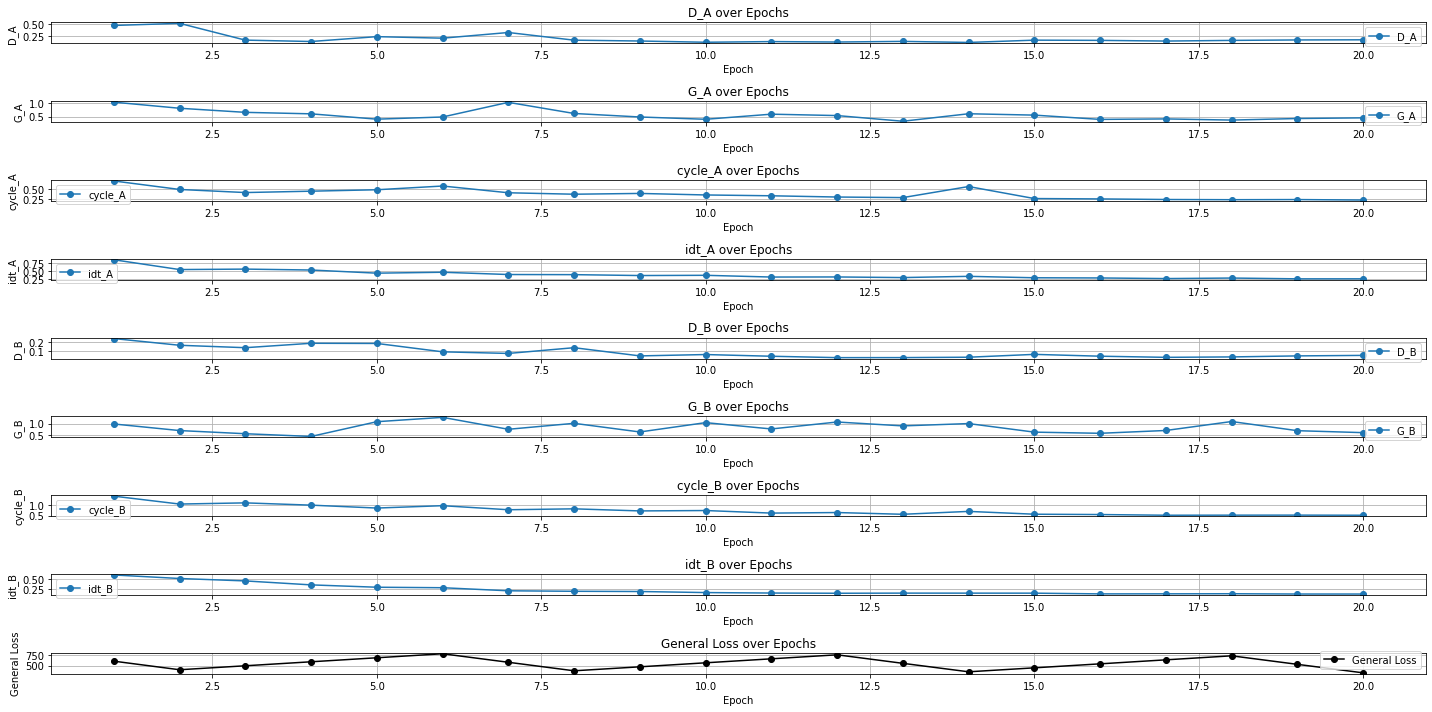

In [21]:
# Define log file path
HeLa_normal_log_file_path = 'results/HeLa_normal/HeLa_normal/loss_log.txt'

# Define the selected metrics as ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
selected_metrics = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']

# Create an instance of the LogDataParser class
log_data_parser = LogDataParser(HeLa_normal_log_file_path)

# Parse the log data
log_data_parser.parse_log_data()

# Plot the selected metrics
log_data_parser.plot_metrics(selected_metrics, include_general_loss=True)

In [6]:
# Initial Training parameters for GOWT dataset

# Define the parameters for the GOWT dataset
dataroot_GOWT_normal = 'Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse'

# Define the results directory
results_dir_GOWT_normal = 'results/GOWT_normal'

# Define the model parameters
dataset_mode_GOWT_normal = 'unaligned'

# Define the model parameters
name_GOWT_normal = 'GOWT_normal'

# Define the direction of the model
direction_GOWT_normal = 'AtoB'

# Define the number of epochs
n_epochs_GOWT_normal = 10

# Define the number of epochs with a linear decay
n_epochs_decay_GOWT_normal = 10

# Define the input channels
input_nc_GOWT_normal = 3

# Define the output channels
output_nc_GOWT_normal = 3

# Define the batch size
batch_size_GOWT_normal = 24

In [7]:
# Initial command line arguments for GOWT dataset

command_GOWT_normal = f"python train.py --dataroot {dataroot_GOWT_normal} --results_dir {results_dir_GOWT_normal} --dataset_mode {dataset_mode_GOWT_normal} --name {name_GOWT_normal} --direction {direction_GOWT_normal} --n_epochs {n_epochs_GOWT_normal} --n_epochs_decay {n_epochs_decay_GOWT_normal} --input_nc {input_nc_GOWT_normal} --output_nc {output_nc_GOWT_normal} --batch_size {batch_size_GOWT_normal}"

# Execute the command
result_GOWT = subprocess.run(command_GOWT_normal, shell=True, text=True, capture_output=True)

# Print the result and Error
print("STDOUT: ", result_GOWT.stdout)
print("STDERR: ", result_GOWT.stderr)

STDOUT:  ----------------- Options ---------------
               batch_size: 24                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: results/GOWT_normal/GOWT_normal	[default: None]
           continue_train: False                         
                crop_size: 128                           
                 dataroot: Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
   

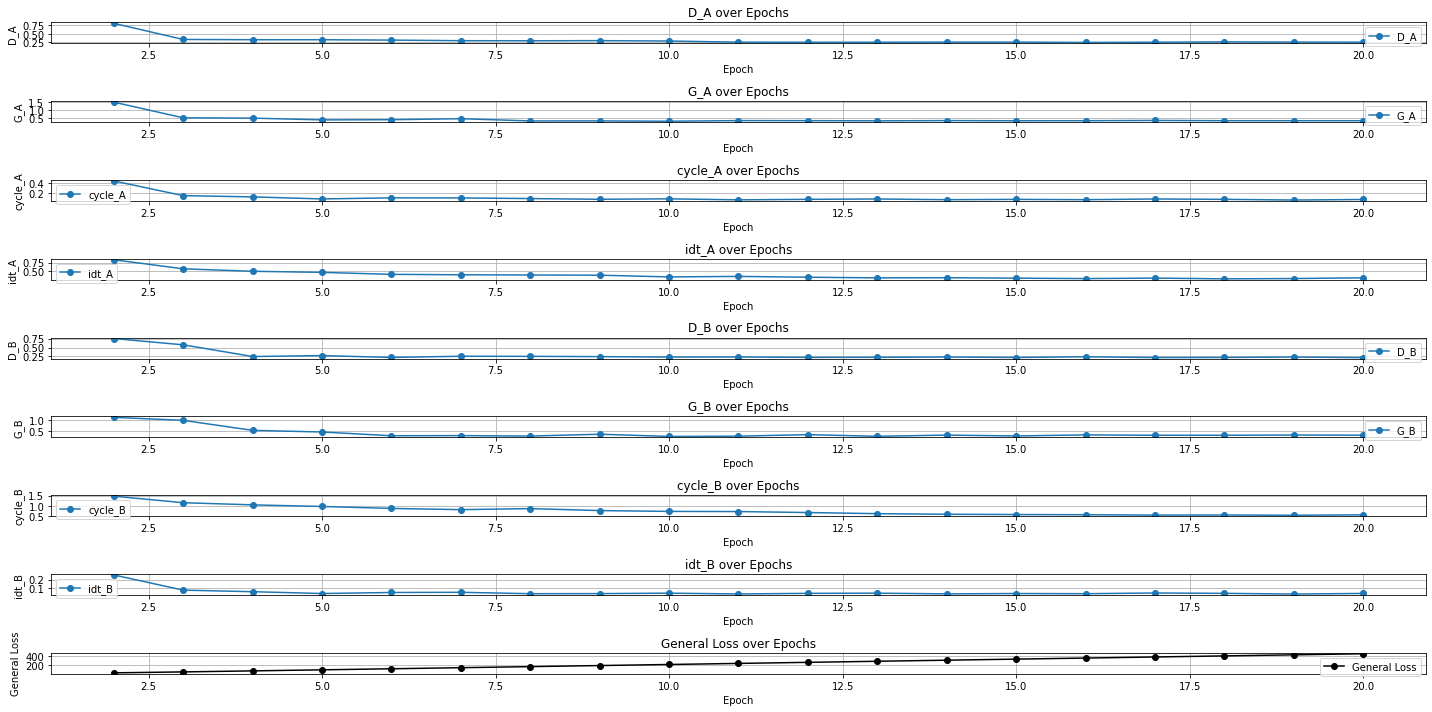

In [22]:
# Display the loss plot

# Define log file path
GOWT_normal_log_file_path = 'results/GOWT_normal/GOWT_normal/loss_log.txt'

# Define the selected metrics as ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
selected_metrics = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']

# Create an instance of the LogDataParser class
log_data_parser = LogDataParser(GOWT_normal_log_file_path)

# Parse the log data
log_data_parser.parse_log_data()

# Plot the selected metrics
log_data_parser.plot_metrics(selected_metrics, include_general_loss=True)

## Methodologies for Model Assessment

In our quest for a model that achieves natural staining effects, it's crucial to consider both the cells and their surrounding background. Observations reveal that both elements exhibit staining effects post-staining.

We introduce an evaluation module designed specifically for the stain transfer task. This module is essential for assessing the model's performance post-training, particularly in relation to stain transfer. The evaluation leverages several theoretical principles, each aimed at different aspects of the task.

### Accuracy Mean \(L_{\text{acc}}\)

The Accuracy Mean \(L_{\text{acc}}\) is a measure comparing the binary representation of the stained image to the ground truth, serving as a basic accuracy metric for stain transfer. The metric is calculated as:

$$
L_{\mathrm{acc}}=\frac{\sum \operatorname{AND}\left(B_{\mathrm{img}}, B_{\mathrm{gt}}\right)}{\sum \mathrm{OR}\left(B_{\mathrm{img}}, B_{\mathrm{gt}}\right)}
$$

### Grayscale Correlation \(L_{\text{gray}}\)

The Grayscale Correlation \(L_{\text{gray}}\) assesses grayscale variation preservation using the Structural Similarity Index Measure (SSIM), crucial for maintaining textural and intensity details. The formula is:

$$
L_{\text{gray}}\left(G_{\mathrm{img}}, G_{\mathrm{gt}}\right)=\frac{\left(2 \mu_{G_{\mathrm{img}}} \mu_{G_{\mathrm{gt}}}+c_{1}\right)\left(2 \sigma_{G_{\mathrm{img}} G_{\mathrm{gt}}}+c_{2}\right)}{\left(\mu_{G_{\mathrm{img}}}^{2}+\mu_{G_{\mathrm{gt}}}^{2}+c_{1}\right)\left(\sigma_{G_{\mathrm{img}}}^{2}+\sigma_{G_{\mathrm{gt}}}^{2}+c_{2}\right)}
$$

### Color Correlation \(L_{\text{color}}\)

The Color Correlation \(L_{\text{color}}\) evaluates the correlation between the color distributions of the stained and original images, important for color characteristic preservation after staining. The metric formula is:

$$
L_{\text{color}}=\sum_{i=1}^{n} \sum_{j \neq i} \max \left(0, \operatorname{CORR}\left(C_{\mathrm{img}}, C_{\mathrm{gt}}\right)\right)
$$

### Overall Performance Score

The Overall Performance Score combines individual metric scores into a single comprehensive score, allowing for a holistic evaluation of staining quality. The score is calculated as:

$$
Score =w_{\text{acc}} \cdot L_{\text{acc}}+w_{\text{gray}} \cdot L_{\text{gray}}+w_{\text{color}} \cdot L_{\text{color}}
$$

where the weights \(w_{\text{acc}}=0.4\), \(w_{\text{gray}}=0.4\), and \(w_{\text{color}}=0.2\) reflect the importance of each metric in the overall evaluation.

### FID Score for Universal Evaluation

To ensure a universal and comprehensive evaluation, we also incorporate the Fréchet Inception Distance (FID) Score. The FID Score is a critical metric for quantifying the quality of generated images by comparing the distribution of generated images to that of real images. It measures the similarity between these two distributions, capturing both the texture and color distribution of the images. The lower the FID score, the more similar the generated images are to the real ones, indicating higher quality and naturalness of the stain transfer. The FID Score is added to our evaluation methodology to complement our custom metrics, providing a broader perspective on the model's performance in generating realistic staining effects.

In [11]:
""" 
Define the function to move the models from different epochs to a new directory.
Based on the model saving strategy, the models are saved in the format of epoch_net_G.pth where net is the network name and G is the generator.
Every 5 epochs, the models are saved in the format of epoch_net_G.pth.
Files are ended with {i}_net_G_A.pth or {i}_net_G_B.pth as discriminator and {i}_net_D_A.pth or {i}_net_D_B.pth as generator.
The saving directory is in the format of /staining_results/{model_name}/Epoch{i}/latest_net_G_A.pth, latest_net_G_B.pth, latest_net_D_A.pth, latest_net_D_B.pth
Parameters:
    - model_dir: The directory containing the models
    - new_dir: The new directory to move the models to
    - n_epochs: The total number of epochs to saving
"""
def move_models(src_dir, dst_dir, n_epochs):
    # Loop through the numbers 5 to n_epochs in increments of 5
    for i in range(5, n_epochs, 5):
        epoch_dir_name = f'Epoch{i}'
        epoch_dir_path = os.path.join(dst_dir, epoch_dir_name)
        
        # Create the sub-directory if it doesn't exist
        if not os.path.exists(epoch_dir_path):
            os.makedirs(epoch_dir_path)

        # File names to look for
        files_to_copy = [f"{i}_net_D_A.pth", f"{i}_net_D_B.pth", f"{i}_net_G_A.pth", f"{i}_net_G_B.pth"]
        
        for file_name in files_to_copy:
            src_file_path = os.path.join(src_dir, file_name)
            
            # Check if the file exists before attempting to copy it
            if os.path.exists(src_file_path):
                new_file_name = file_name.replace(f"{i}_", "latest_")
                dst_file_path = os.path.join(epoch_dir_path, new_file_name)
                
                # Copy the file
                shutil.copy2(src_file_path, dst_file_path)

    # Print success message
    print(f"Models moved to {dst_dir} successfully")

In [13]:
# Move models for HeLa dataset
move_models('results/HeLa_normal/HeLa_normal', 'staining_results/HeLa_normal', n_epochs_HeLa_normal + n_epochs_decay_HeLa_normal)

# Move models for GOWT dataset
move_models('results/GOWT_normal/GOWT_normal', 'staining_results/GOWT_normal', n_epochs_GOWT_normal + n_epochs_decay_GOWT_normal)

Models moved to staining_results/HeLa_normal successfully
Models moved to staining_results/GOWT_normal successfully


In [107]:
""" 
Define the function to evaluate the models on the test dataset tranverse all saved epoch models.
Parameters:
    - dataroot: The directory containing the test dataset
    - model_dir: The directory containing the models
    - n_epochs: The total number of epochs to evaluate
    - model_name: The name of the model
    - direction: The direction of the model
    - input_nc: The number of input channels
    - output_nc: The number of output channels
"""
def evaluate_models(dataroot, model_dir, n_epochs, model_name, direction, input_nc, output_nc, dataset_mode):
    # Loop through the numbers 5 to n_epochs in increments of 5
    for i in range(5, n_epochs, 5):
        print(f"Evaluating model in {model_dir}")
        epoch_dir_name = f'Epoch{i}'
        epoch_dir_path = os.path.join(model_dir, epoch_dir_name)

        print(f"Evaluating model in {epoch_dir_path}")
        
        # Command to evaluate the model
        command = f"python test.py --dataroot {dataroot} --name {epoch_dir_path} --no_dropout --model {model_name} --direction {direction} --input_nc {input_nc} --output_nc {output_nc} --dataset_mode {dataset_mode}"

        # Execute the command
        result = subprocess.run(command, shell=True, text=True, capture_output=True)

        # Print the result and Error
        print("STDOUT: ", result.stdout)
        print("STDERR: ", result.stderr)

In [38]:
# Test the models of HeLa

# Define the parameters for the HeLa dataset Test
dataroot_HeLa_normal_eval = 'Training_Datasets/training_dataset_tiledHeLa_Fakulty'

# Define the model directory
model_dir_HeLa_normal_eval = '/home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/HeLa_normal'

# Evaluate the models
evaluate_models(dataroot_HeLa_normal_eval, model_dir_HeLa_normal_eval, n_epochs_HeLa_normal + n_epochs_decay_HeLa_normal, 'cycle_gan', direction_HeLa_normal, input_nc_HeLa_normal, output_nc_HeLa_normal, 'unaligned')

Evaluating model in /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/HeLa_normal
Evaluating model in /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/HeLa_normal/Epoch5
STDOUT:  ----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/HeLa_normal/Epoch5	[default: None]
                crop_size: 128                           
                 dataroot: Training_Datasets/training_dataset_tiledHeLa_Fakulty	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                in

In [70]:
""" 
Define the function to move the images from the source directory to the target directory.
The images are saved in the format of {original_part}_{index_part}.png.
For HeLa dataset, take 0 position as original part and 1 position as index part.
For GOWT dataset, take 1 position as original part and 2 position as index part.
Parameters:
    - src_dir: The source directory containing the images
    - dst_dir: The target directory to move the images to
    - n_epochs: The total number of epochs to move the images
    - original_part: The position of the original part in the image name
    - index_part: The position of the index part in the image name

"""

def move_images(source_base_path, target_base_path, n_epochs, original_index, index_index):
    for epoch in range(5, n_epochs, 5):  # Starts at Epoch5 and ends at Epoch60, incrementing by 5
        source_epoch_path = os.path.join(source_base_path, f'Epoch{epoch}', 'test_latest', 'images')
        target_epoch_path = os.path.join(target_base_path, f'Epoch{epoch}')
        
        # Create the corresponding target epoch directory if it doesn't exist
        if not os.path.exists(target_epoch_path):
            os.makedirs(target_epoch_path)

        # Iterate over each file in the source epoch directory
        for filename in os.listdir(source_epoch_path):
            if filename.endswith('_fake_B.png'):
                # Split filename and extract parts based on original_index and index_index
                parts = filename.split('_')
                
                # Convert original_index and index_index to integers
                original_index_int = int(original_index)
                index_index_int = int(index_index)

                # Extract the original part of the name and the index part
                original_part = parts[original_index_int]
                index_part = parts[index_index_int].split('_fake_B.png')[0]

                # Construct the new filename
                new_filename = f'{original_part}_{index_part}.png'

                # Construct the full path for source and target
                source_file_path = os.path.join(source_epoch_path, filename)
                target_file_path = os.path.join(target_epoch_path, new_filename)

                # Copy the file
                shutil.copy2(source_file_path, target_file_path)

In [72]:
# Move images for HeLa dataset

# Define the source and target directories
source_base_path_HeLa = 'staining_results/HeLa_normal'

target_base_path_HeLa = 'Evaluation_Dataset/HeLa_normal'

# Move the images
move_images(source_base_path_HeLa, target_base_path_HeLa, n_epochs_HeLa_normal + n_epochs_decay_HeLa_normal, 0, 1)


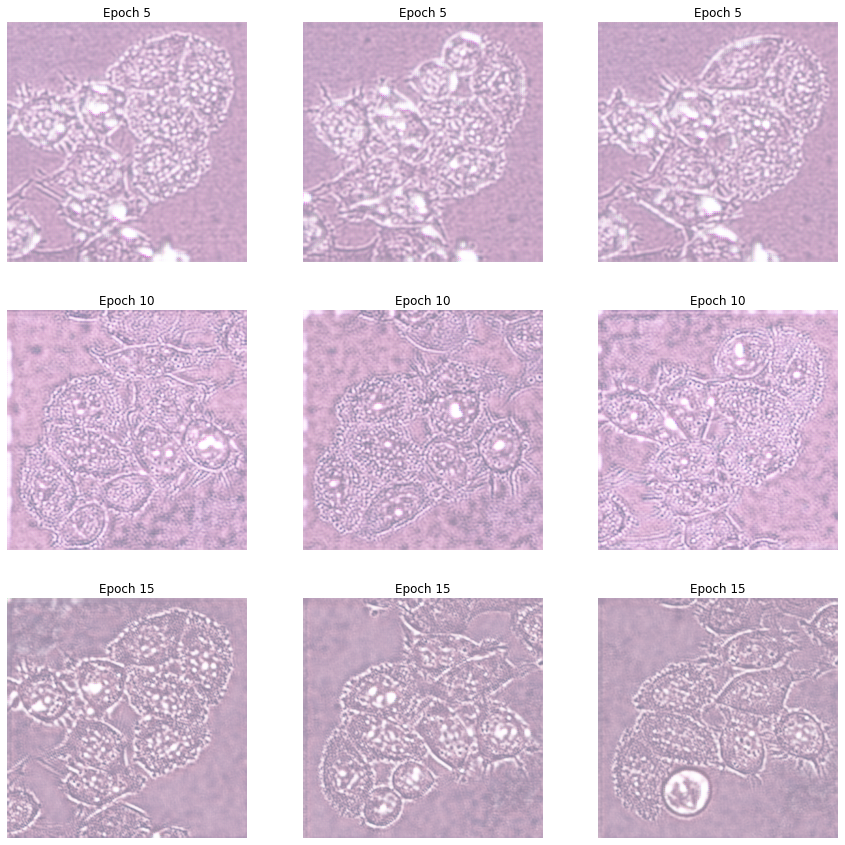

In [76]:
# Loop through the numbers 5 to n_epochs in increments of 5 in target_base_path_HeLa directory and display the images

visualize_images([os.path.join(target_base_path_HeLa, f'Epoch{i}') for i in range(5, n_epochs_HeLa_normal + n_epochs_decay_HeLa_normal, 5)], rows=[f'Epoch {i}' for i in range(5, n_epochs_HeLa_normal + n_epochs_decay_HeLa_normal, 5)])

In [83]:
# Evaluate the models of HeLa

# Initialize the parameters for the GOWT dataset evaluation
HeLa_normal_stained_img_base_path = 'Evaluation_Dataset/HeLa_normal'

# Ground truth images
HeLa_normal_gt_img_base_path = 'Evaluation_Dataset/HeLa_normal'

# Colorized images target directory
HeLa_normal_colorized_img_base_path = '/home/frozen/CV_FinalProject/Cell_cycleGAN/Training_Datasets/training_dataset_tiledHeLa_Fakulty/testB'

# Initial command line arguments for HeLa dataset evaluation
command = f"python evaluation/Stain_Evaluation.py {HeLa_normal_stained_img_base_path} {HeLa_normal_gt_img_base_path} {HeLa_normal_colorized_img_base_path} {n_epochs_decay_HeLa_normal + n_epochs_HeLa_normal}"

# Execute the command
result = subprocess.run(command, shell=True, text=True, capture_output=True)

# Print the result and Error
print("STDOUT: ", result.stdout)
print("STDERR: ", result.stderr)

STDOUT:  Starting evaluation for epoch 5
Starting evaluation for epoch 10
Starting evaluation for epoch 15

STDERR:  


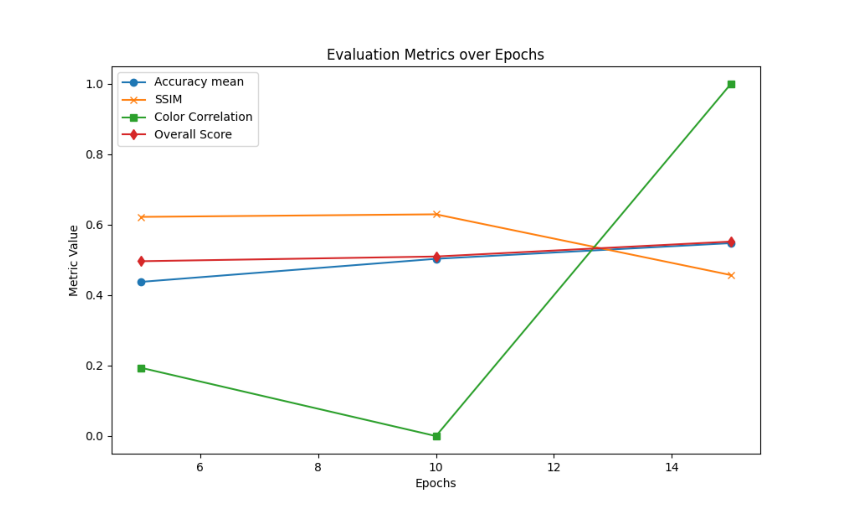

In [89]:
# Read and display evaluation_metrics.png and FID.png to display the evaluation metrics

# Display the evaluation metrics
evaluation_metrics_img = plt.imread('Evaluation_Dataset/HeLa_normal/evaluation_metrics.png')
# Set the size of the plot
plt.figure(figsize=(15, 15))
# Remove the axis
plt.axis('off')
plt.imshow(evaluation_metrics_img)




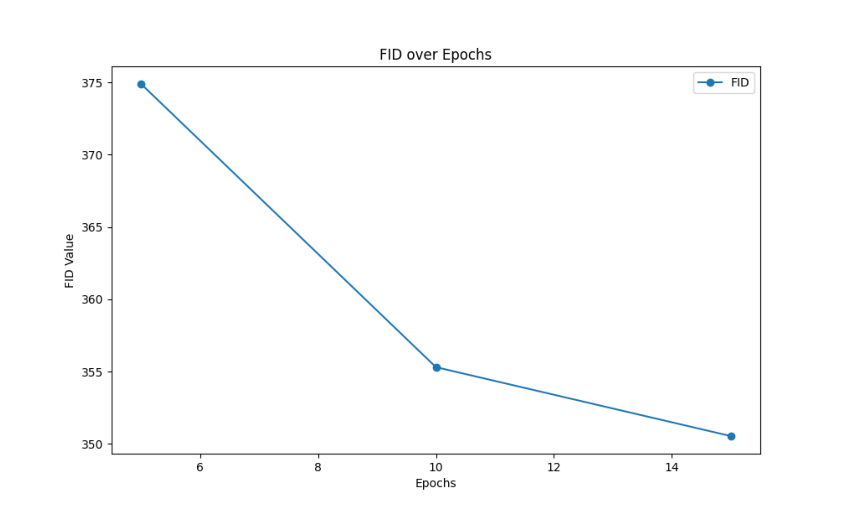

In [91]:
# Display the FID
FID_img = plt.imread('Evaluation_Dataset/HeLa_normal/FID.png')
# Set the size of the plot
plt.figure(figsize=(15, 15))
# Remove the axis
plt.axis('off')
plt.imshow(FID_img)

In [79]:
# Test the models of GOWT

# Define the parameters for the GOWT dataset Test
dataroot_GOWT_normal_eval = 'Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse'

# Define the model directory
model_dir_GOWT_normal_eval = '/home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/GOWT_normal'

# Evaluate the models
evaluate_models(dataroot_GOWT_normal_eval, model_dir_GOWT_normal_eval, n_epochs_GOWT_normal + n_epochs_decay_GOWT_normal, 'cycle_gan', direction_GOWT_normal, input_nc_GOWT_normal, output_nc_GOWT_normal, 'unaligned')

Evaluating model in /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/GOWT_normal
Evaluating model in /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/GOWT_normal/Epoch5
STDOUT:  ----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/GOWT_normal/Epoch5	[default: None]
                crop_size: 128                           
                 dataroot: Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
          

In [73]:
# Move images for GOWT dataset

# Define the source and target directories
source_base_path_GOWT = 'staining_results/GOWT_normal'

target_base_path_GOWT = 'Evaluation_Dataset/GOWT_normal'

# Move the images
move_images(source_base_path_GOWT, target_base_path_GOWT, n_epochs_GOWT_normal + n_epochs_decay_GOWT_normal, 1, 2)

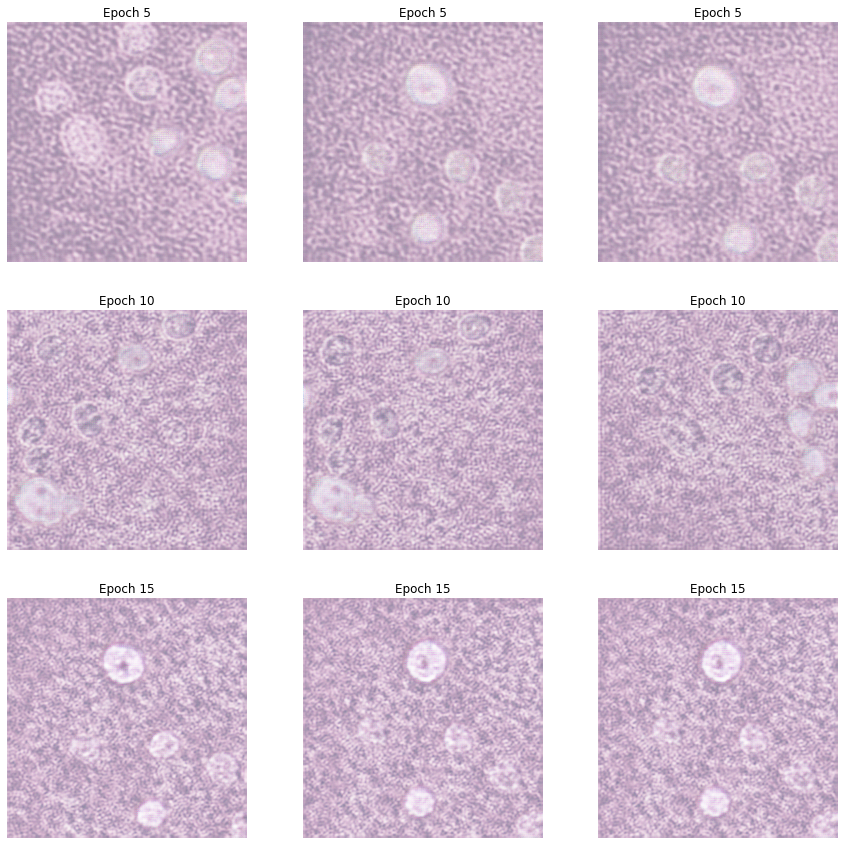

In [77]:
# Visualize the images

# Loop through the numbers 5 to n_epochs in increments of 5 in target_base_path_GOWT directory and display the images
visualize_images([os.path.join(target_base_path_GOWT, f'Epoch{i}') for i in range(5, n_epochs_GOWT_normal + n_epochs_decay_GOWT_normal, 5)], rows=[f'Epoch {i}' for i in range(5, n_epochs_GOWT_normal + n_epochs_decay_GOWT_normal, 5)])

In [93]:
# Evaluate the models of GOWT

# Initialize the parameters for the GOWT dataset evaluation
GOWT_normal_stained_img_base_path = 'Evaluation_Dataset/GOWT_normal'

# Ground truth images
GOWT_normal_gt_img_base_path = 'Evaluation_Dataset/GOWT_normal'

# Colorized images target directory
GOWT_normal_colorized_img_base_path = '/home/frozen/CV_FinalProject/Cell_cycleGAN/Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse/testB'

# Initial command line arguments for GOWT dataset evaluation
command = f"python evaluation/Stain_Evaluation.py {GOWT_normal_stained_img_base_path} {GOWT_normal_gt_img_base_path} {GOWT_normal_colorized_img_base_path} {n_epochs_decay_GOWT_normal + n_epochs_GOWT_normal}"

# Execute the command
result = subprocess.run(command, shell=True, text=True, capture_output=True)

# Print the result and Error
print("STDOUT: ", result.stdout)
print("STDERR: ", result.stderr)


STDOUT:  Starting evaluation for epoch 5
Starting evaluation for epoch 10
Starting evaluation for epoch 15

STDERR:  


In [94]:
# Read and display evaluation_metrics.png and FID.png to display the evaluation metrics

# Display the evaluation metrics
evaluation_metrics_img = plt.imread('Evaluation_Dataset/GOWT_normal/evaluation_metrics.png')

# Set the size of the plot
plt.figure(figsize=(15, 15))

# Remove the axis
plt.axis('off')

plt.imshow(evaluation_metrics_img)


In [95]:
# Display the FID
FID_img = plt.imread('Evaluation_Dataset/GOWT_normal/FID.png')

# Set the size of the plot
plt.figure(figsize=(15, 15))

# Remove the axis
plt.axis('off')

plt.imshow(FID_img)


# Part 2: Enhanced CycleGAN Colorization Strategy

## Overview

Building upon our foundational approach to cellular image colorization using CycleGAN, we further refine our strategy to ensure the generated images align more closely with segmentation quality requirements. Recognizing the necessity of guiding the colorization process towards more accurate representations, we introduce additional evaluation metrics to constrain and enhance the colorization outputs. This methodology revolves around three primary evaluation aspects: ground truth comparison, structural similarity (SSIM) in grayscale, and color space (HSV) alignment.

## Enhanced Loss Function Integration

To achieve a more directed colorization process, we modify the CycleGAN's loss functions to incorporate the following elements:

### Ground Truth Loss

This loss component measures the discrepancy between the colorized output and a provided ground truth image, ensuring the colorization adheres to expected cellular structures.

- **Formula:** \( \text{loss}_{\text{GT\_fake}} = \text{GT\_Loss}(\text{fake\_A}, \text{real\_A\_GT}) \)
- **Formula:** \( \text{loss}_{\text{GT\_rec}} = \text{GT\_Loss}(\text{rec\_A}, \text{real\_A\_GT}) \)

### Color Variation Loss

Aims to maintain color consistency and variation within the colorized images, comparing the original and the generated images in terms of their color distributions.

- **Formula:** \( \text{loss}_{\text{color\_variation\_fake}} = \text{ColorVariation\_Loss}(\text{real\_A}, \text{fake\_B}) \)
- **Formula:** \( \text{loss}_{\text{color\_variation\_rec}} = \text{ColorVariation\_Loss}(\text{real\_A}, \text{rec\_B}) \)

### HSV Loss

Focuses on the alignment of the hue, saturation, and value (HSV) color space between the generated and target images, emphasizing color accuracy and perceptual similarity.

- **Formula:** \( \text{loss}_{\text{hsv\_fake}} = \text{HSV\_Loss}(\text{fake\_B}, \text{real\_B}) \)
- **Formula:** \( \text{loss}_{\text{hsv\_rec}} = \text{HSV\_Loss}(\text{rec\_B}, \text{real\_B}) \)

## Composite Loss Calculation and Gradient Update

The total generator loss is a weighted sum of the individual losses, including the original CycleGAN losses (identity, GAN, and cycle-consistency losses) and the newly integrated losses, prioritizing ground truth alignment, color variation, and HSV space fidelity.

- **Composite Loss Formula:** \( \text{loss}_G = \text{loss}_{G_A} + \text{loss}_{G_B} + \text{loss}_{cycle\_A} + \text{loss}_{cycle\_B} + \text{loss}_{idt\_A} + \text{loss}_{idt\_B} + 5 \times \text{loss}_{GT\_rec} + 5 \times \text{loss}_{color\_variation\_rec} + 10 \times \text{loss}_{hsv\_rec} + 5 \times \text{loss}_{GT\_fake} + 5 \times \text{loss}_{color\_variation\_fake} + 10 \times \text{loss}_{hsv\_fake} \)

## Performance Evaluation with FID Score

Upon integrating the enhanced loss functions, we aim to demonstrate the qualitative and quantitative improvements in the colorized images. For a comprehensive evaluation, the Fréchet Inception Distance (FID) score is employed as a global metric to compare the distributions of generated images against real images, highlighting the advancements in realism and adherence to cellular structural accuracy.

This strategic enhancement in the CycleGAN colorization process underscores our commitment to pushing the boundaries of medical image analysis, ensuring that the generated cellular images are not only visually accurate but also highly conducive to segmentation tasks and further analytical examinations.


In [98]:
# Initialize the parameters for the improved HeLa dataset colorization
dataroot_HeLa_improved = 'Training_Datasets/training_dataset_tiledHeLa_Fakulty'

results_dir_HeLa_improved = 'results/HeLa_improved'

dataset_mode_HeLa_improved = 'improvedunaligned'

name_HeLa_improved = 'HeLa_improved'

direction_HeLa_improved = 'AtoB'

n_epochs_HeLa_improved = 10

n_epochs_decay_HeLa_improved = 10

input_nc_HeLa_improved = 1

output_nc_HeLa_improved = 3

model_HeLa_improved = 'seg_cycle_gan'

batch_size_HeLa_improved = 8

In [99]:
# Initial command line arguments for HeLa dataset
command_HeLa_improved = f"python train.py --dataroot {dataroot_HeLa_improved} --results_dir {results_dir_HeLa_improved} --dataset_mode {dataset_mode_HeLa_improved} --name {name_HeLa_improved} --direction {direction_HeLa_improved} --n_epochs {n_epochs_HeLa_improved} --n_epochs_decay {n_epochs_decay_HeLa_improved} --input_nc {input_nc_HeLa_improved} --output_nc {output_nc_HeLa_improved} --model {model_HeLa_improved} --batch_size {batch_size_HeLa_improved}"

# Execute the command
result_HeLa_improved = subprocess.run(command_HeLa_improved, shell=True, text=True, capture_output=True)

# Print the result and Error
print("STDOUT: ", result_HeLa_improved.stdout)
print("STDERR: ", result_HeLa_improved.stderr)

STDOUT:  ----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: results/HeLa_improved/HeLa_improved	[default: None]
           continue_train: False                         
                crop_size: 128                           
                 dataroot: Training_Datasets/training_dataset_tiledHeLa_Fakulty	[default: None]
             dataset_mode: improvedunaligned             	[default: unaligned]
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256              

<ipython-input-19-b87a6cf7fbb1>:93: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


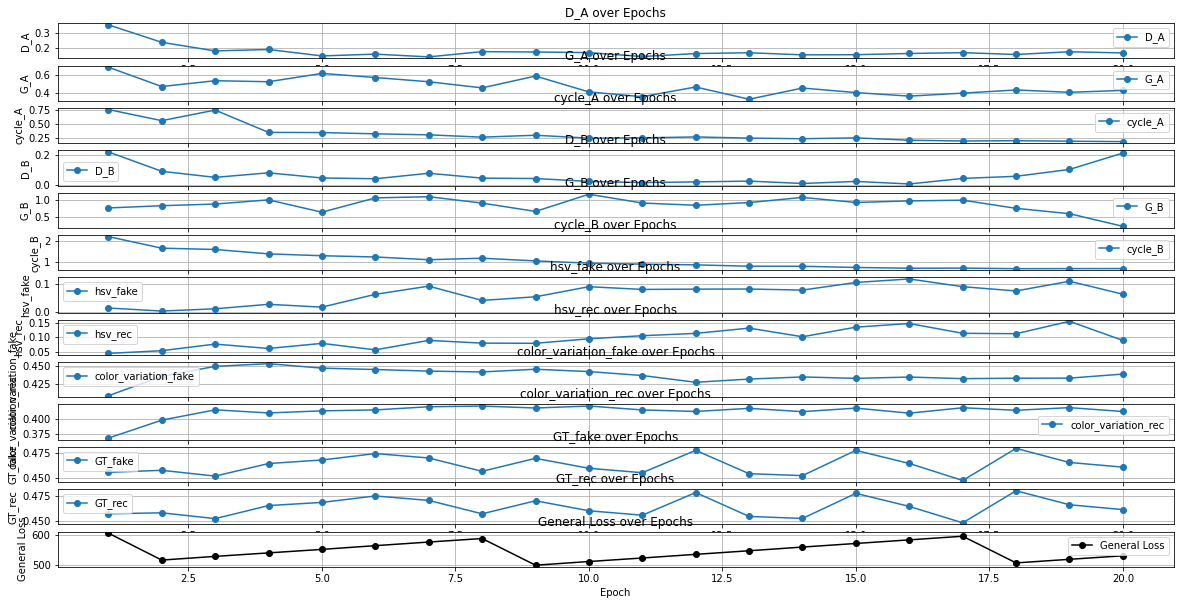

In [100]:
# Display the loss plot

# Define log file path
HeLa_improved_log_file_path = 'results/HeLa_improved/HeLa_improved/loss_log.txt'

# Define the selected metrics as ['D_A', 'G_A', 'cycle_A', 'D_B', 'G_B', 'cycle_B', 'hsv_fake', 'hsv_rec', 'color_variation_fake', 'color_variation_rec', 'GT_fake', 'GT_rec']
selected_metrics = ['D_A', 'G_A', 'cycle_A', 'D_B', 'G_B', 'cycle_B', 'hsv_fake', 'hsv_rec', 'color_variation_fake', 'color_variation_rec', 'GT_fake', 'GT_rec']

# Create an instance of the LogDataParser class
log_data_parser = LogDataParser(HeLa_improved_log_file_path)

# Parse the log data
log_data_parser.parse_log_data()

# Plot the selected metrics
log_data_parser.plot_metrics(selected_metrics, include_general_loss=True)


In [101]:
# Initialize the parameters for the improved GOWT dataset colorization
dataroot_GOWT_improved = 'Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse'

results_dir_GOWT_improved = 'results/GOWT_improved'

dataset_mode_GOWT_improved = 'improvedunaligned'

name_GOWT_improved = 'GOWT_improved'

direction_GOWT_improved = 'AtoB'

n_epochs_GOWT_improved = 10

n_epochs_decay_GOWT_improved = 10

input_nc_GOWT_improved = 1

output_nc_GOWT_improved = 3

model_GOWT_improved = 'seg_cycle_gan'

batch_size_GOWT_improved = 24

In [102]:
# Initial command line arguments for GOWT dataset
command_GOWT_improved = f"python train.py --dataroot {dataroot_GOWT_improved} --results_dir {results_dir_GOWT_improved} --dataset_mode {dataset_mode_GOWT_improved} --name {name_GOWT_improved} --direction {direction_GOWT_improved} --n_epochs {n_epochs_GOWT_improved} --n_epochs_decay {n_epochs_decay_GOWT_improved} --input_nc {input_nc_GOWT_improved} --output_nc {output_nc_GOWT_improved} --model {model_GOWT_improved} --batch_size {batch_size_GOWT_improved}"

# Execute the command
result_GOWT_improved = subprocess.run(command_GOWT_improved, shell=True, text=True, capture_output=True)

# Print the result and Error
print("STDOUT: ", result_GOWT_improved.stdout)
print("STDERR: ", result_GOWT_improved.stderr)

STDOUT:  ----------------- Options ---------------
               batch_size: 24                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: results/GOWT_improved/GOWT_improved	[default: None]
           continue_train: False                         
                crop_size: 128                           
                 dataroot: Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse	[default: None]
             dataset_mode: improvedunaligned             	[default: unaligned]
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256      

In [103]:
# Display the loss plot

# Define log file path
GOWT_improved_log_file_path = 'results/GOWT_improved/GOWT_improved/loss_log.txt'

# Define the selected metrics as ['D_A', 'G_A', 'cycle_A', 'D_B', 'G_B', 'cycle_B', 'hsv_fake', 'hsv_rec', 'color_variation_fake', 'color_variation_rec', 'GT_fake', 'GT_rec']
selected_metrics = ['D_A', 'G_A', 'cycle_A', 'D_B', 'G_B', 'cycle_B', 'hsv_fake', 'hsv_rec', 'color_variation_fake', 'color_variation_rec', 'GT_fake', 'GT_rec']

# Create an instance of the LogDataParser class
log_data_parser = LogDataParser(GOWT_improved_log_file_path)

# Parse the log data
log_data_parser.parse_log_data()

# Plot the selected metrics
log_data_parser.plot_metrics(selected_metrics, include_general_loss=True)

<ipython-input-19-b87a6cf7fbb1>:93: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


In [104]:
# Move models for HeLa dataset
move_models('results/HeLa_improved/HeLa_improved', 'staining_results/HeLa_improved', n_epochs_HeLa_improved + n_epochs_decay_HeLa_improved)

Models moved to staining_results/HeLa_improved successfully


In [108]:
# Test the models of HeLa

# Define the parameters for the HeLa dataset Test
dataroot_HeLa_improved_eval = 'Training_Datasets/training_dataset_tiledHeLa_Fakulty'

# Define the model directory
model_dir_HeLa_improved_eval = '/home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/HeLa_improved'

# Evaluate the models
evaluate_models(dataroot_HeLa_improved_eval, model_dir_HeLa_improved_eval, n_epochs_HeLa_improved + n_epochs_decay_HeLa_improved, 'seg_cycle_gan', direction_HeLa_improved, input_nc_HeLa_improved, output_nc_HeLa_improved, 'improvedunaligned')

Evaluating model in /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/HeLa_improved
Evaluating model in /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/HeLa_improved/Epoch5
STDOUT:  ----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/HeLa_improved/Epoch5	[default: None]
                crop_size: 128                           
                 dataroot: Training_Datasets/training_dataset_tiledHeLa_Fakulty	[default: None]
             dataset_mode: improvedunaligned             	[default: unaligned]
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                     

In [109]:
# Move images for HeLa dataset

# Define the source and target directories
source_base_path_HeLa = 'staining_results/HeLa_improved'

target_base_path_HeLa = 'Evaluation_Dataset/HeLa_improved'

# Move the images
move_images(source_base_path_HeLa, target_base_path_HeLa, n_epochs_HeLa_improved + n_epochs_decay_HeLa_improved, 0, 1)

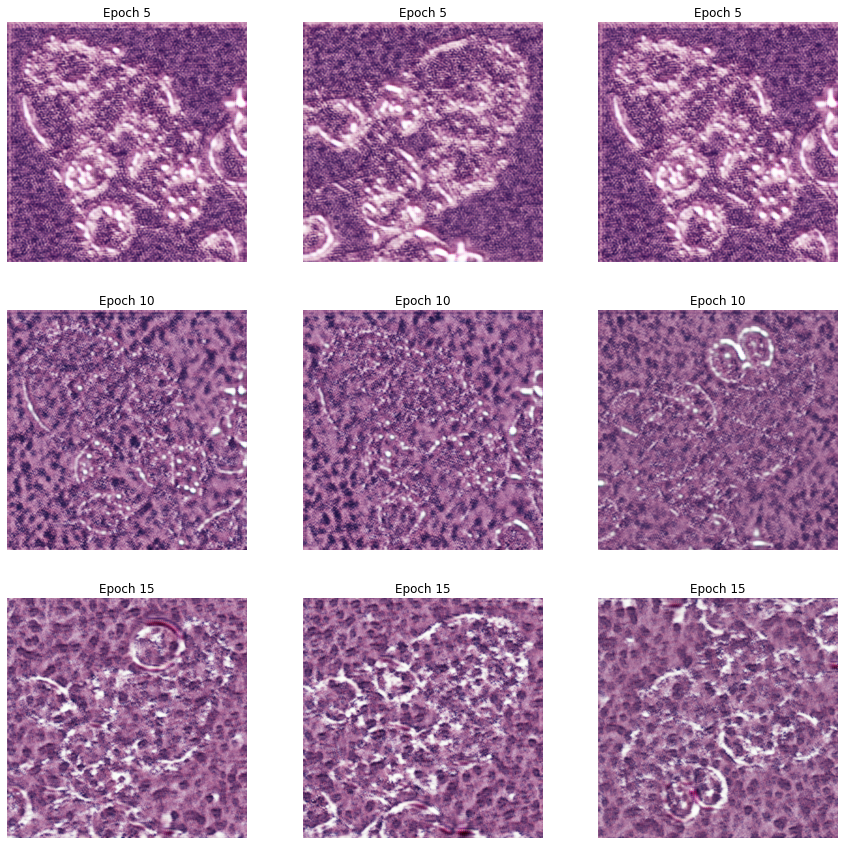

In [110]:
# Loop through the numbers 5 to n_epochs in increments of 5 in target_base_path_HeLa directory and display the images

visualize_images([os.path.join(target_base_path_HeLa, f'Epoch{i}') for i in range(5, n_epochs_HeLa_improved + n_epochs_decay_HeLa_improved, 5)], rows=[f'Epoch {i}' for i in range(5, n_epochs_HeLa_improved + n_epochs_decay_HeLa_improved, 5)])

In [111]:
# Evaluate the models of HeLa

# Initialize the parameters for the improved HeLa dataset evaluation
HeLa_improved_stained_img_base_path = 'Evaluation_Dataset/HeLa_improved'

# Ground truth images
HeLa_improved_gt_img_base_path = 'Evaluation_Dataset/HeLa_improved'

# Colorized images target directory
HeLa_improved_colorized_img_base_path = '/home/frozen/CV_FinalProject/Cell_cycleGAN/Training_Datasets/training_dataset_tiledHeLa_Fakulty/testB'

# Initial command line arguments for HeLa dataset evaluation
command = f"python evaluation/Stain_Evaluation.py {HeLa_improved_stained_img_base_path} {HeLa_improved_gt_img_base_path} {HeLa_improved_colorized_img_base_path} {n_epochs_decay_HeLa_improved + n_epochs_HeLa_improved}"

# Execute the command
result = subprocess.run(command, shell=True, text=True, capture_output=True)

# Print the result and Error
print("STDOUT: ", result.stdout)
print("STDERR: ", result.stderr)

STDOUT:  Starting evaluation for epoch 5
Starting evaluation for epoch 10
Starting evaluation for epoch 15

STDERR:  


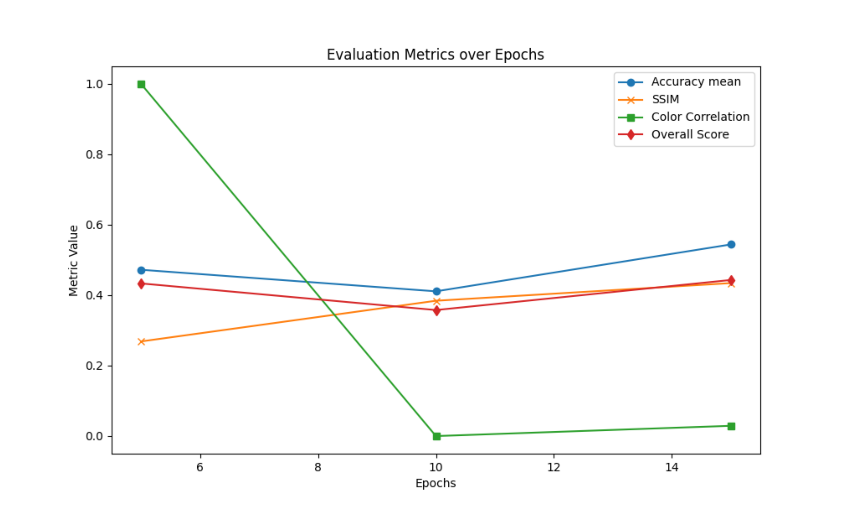

In [112]:
# Read and display evaluation_metrics.png and FID.png to display the evaluation metrics

# Display the evaluation metrics
evaluation_metrics_img = plt.imread('Evaluation_Dataset/HeLa_improved/evaluation_metrics.png')

# Set the size of the plot
plt.figure(figsize=(15, 15))

# Remove the axis
plt.axis('off')

plt.imshow(evaluation_metrics_img)




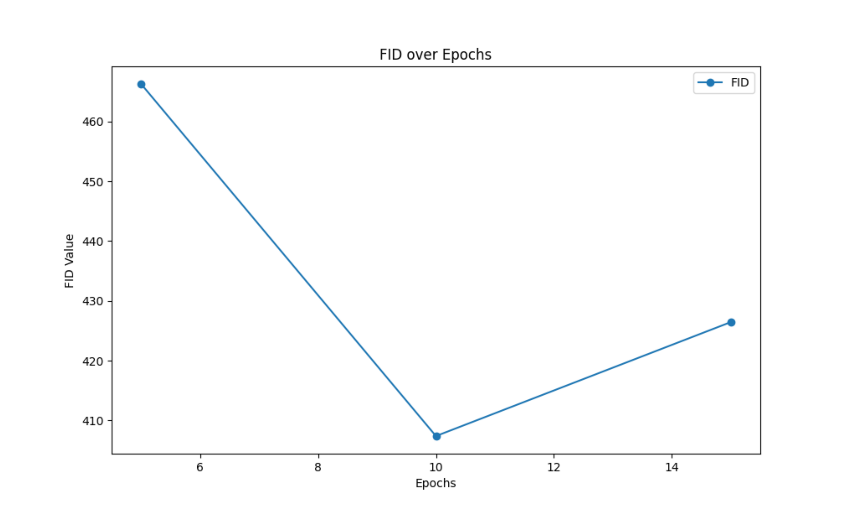

In [113]:
# Display the FID
FID_img = plt.imread('Evaluation_Dataset/HeLa_improved/FID.png')

# Set the size of the plot
plt.figure(figsize=(15, 15))

# Remove the axis
plt.axis('off')

plt.imshow(FID_img)


In [115]:
# move models for GOWT dataset
move_models('results/GOWT_improved/GOWT_improved', 'staining_results/GOWT_improved', n_epochs_GOWT_improved + n_epochs_decay_GOWT_improved)

Models moved to staining_results/GOWT_improved successfully


In [116]:
# Test the models of GOWT

# Define the parameters for the GOWT dataset Test
dataroot_GOWT_improved_eval = 'Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse'

# Define the model directory
model_dir_GOWT_improved_eval = '/home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/GOWT_improved'

# Evaluate the models
evaluate_models(dataroot_GOWT_improved_eval, model_dir_GOWT_improved_eval, n_epochs_GOWT_improved + n_epochs_decay_GOWT_improved, 'seg_cycle_gan', direction_GOWT_improved, input_nc_GOWT_improved, output_nc_GOWT_improved, 'improvedunaligned')

Evaluating model in /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/GOWT_improved
Evaluating model in /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/GOWT_improved/Epoch5
STDOUT:  ----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /home/frozen/CV_FinalProject/Cell_cycleGAN/staining_results/GOWT_improved/Epoch5	[default: None]
                crop_size: 128                           
                 dataroot: Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse	[default: None]
             dataset_mode: improvedunaligned             	[default: unaligned]
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0             

In [117]:
# Move images for GOWT dataset

# Define the source and target directories
source_base_path_GOWT = 'staining_results/GOWT_improved'

target_base_path_GOWT = 'Evaluation_Dataset/GOWT_improved'  

# Move the images
move_images(source_base_path_GOWT, target_base_path_GOWT, n_epochs_GOWT_improved + n_epochs_decay_GOWT_improved, 1, 2)

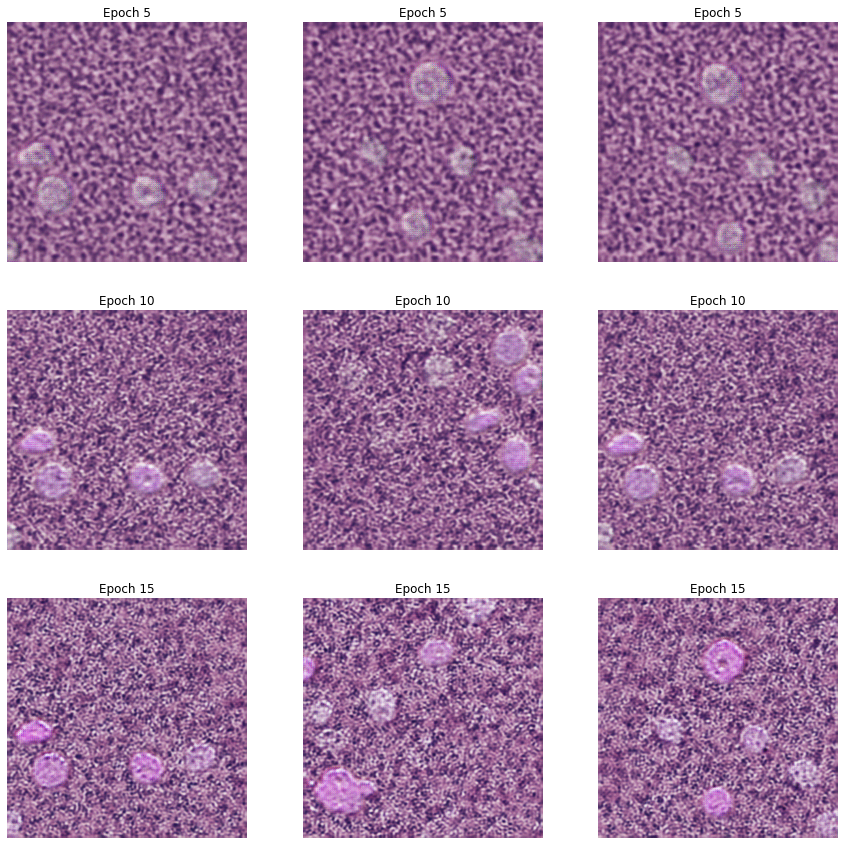

In [118]:
# Visualize the images

# Loop through the numbers 5 to n_epochs in increments of 5 in target_base_path_GOWT directory and display the images
visualize_images([os.path.join(target_base_path_GOWT, f'Epoch{i}') for i in range(5, n_epochs_GOWT_improved + n_epochs_decay_GOWT_improved, 5)], rows=[f'Epoch {i}' for i in range(5, n_epochs_GOWT_improved + n_epochs_decay_GOWT_improved, 5)])



In [119]:
# Evaluate the models of GOWT

# Initialize the parameters for the improved GOWT dataset evaluation
GOWT_improved_stained_img_base_path = 'Evaluation_Dataset/GOWT_improved'

# Ground truth images
GOWT_improved_gt_img_base_path = 'Evaluation_Dataset/GOWT_improved'

# Colorized images target directory
GOWT_improved_colorized_img_base_path = '/home/frozen/CV_FinalProject/Cell_cycleGAN/Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse/testB'

# Initial command line arguments for GOWT dataset evaluation
command = f"python evaluation/Stain_Evaluation.py {GOWT_improved_stained_img_base_path} {GOWT_improved_gt_img_base_path} {GOWT_improved_colorized_img_base_path} {n_epochs_decay_GOWT_improved + n_epochs_GOWT_improved}"

# Execute the command
result = subprocess.run(command, shell=True, text=True, capture_output=True)

# Print the result and Error
print("STDOUT: ", result.stdout)
print("STDERR: ", result.stderr)

STDOUT:  Starting evaluation for epoch 5
Starting evaluation for epoch 10
Starting evaluation for epoch 15

STDERR:  


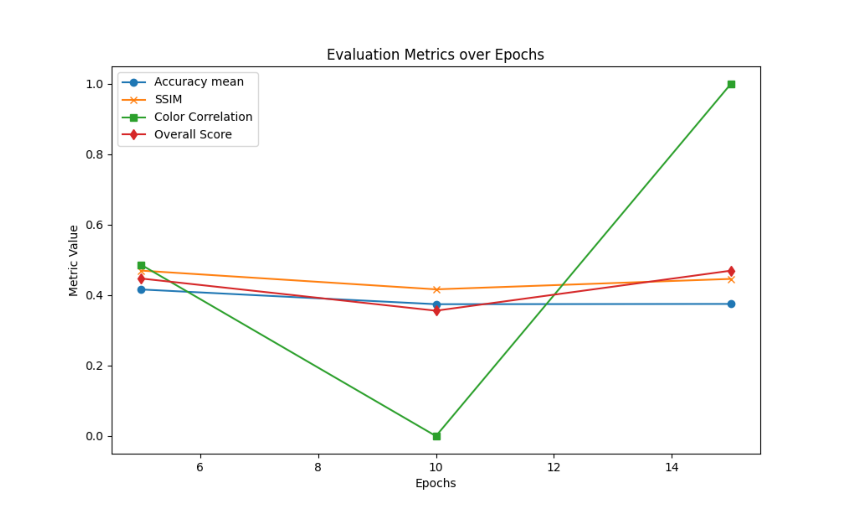

In [120]:
# Read and display evaluation_metrics.png and FID.png to display the evaluation metrics

# Display the evaluation metrics
evaluation_metrics_img = plt.imread('Evaluation_Dataset/GOWT_improved/evaluation_metrics.png')

# Set the size of the plot 
plt.figure(figsize=(15, 15))

# Remove the axis
plt.axis('off')

plt.imshow(evaluation_metrics_img)

In [121]:
# Display the FID
FID_img = plt.imread('Evaluation_Dataset/GOWT_improved/FID.png')

# Set the size of the plot
plt.figure(figsize=(15, 15))

# Remove the axis
plt.axis('off')

plt.imshow(FID_img)